# <font color=darkgreen>Titanic data set analysis and modeling

<img src="https://faithmag.com/sites/default/files/styles/article_full/public/2018-09/titanic2.jpg?h=6521bd5e&itok=H8td6QVv.jpg"  Width="800">

#### This kernel is not a streamlined analysis. I have done detailed exploratory data analysis of Titanic dataset long with different machine learning models and finding the best suited ML model. This is my first kernel on kaggle and very excited to share with kaggle community. I will incorporate more machine learning model and try to improvise existing model implemented in this kernel and will happy to incorporate more suggestions and feedback provided on this kernel.  

## <font color=darkgreen>Approach:
- <i><b>Data cleaning and statistical analysis.
- Exploratory Data Analysis and visualisations.
- Machine learning modelling and Prediction using ML model.
- FInding the best Machine learning model based on various score

### Importing libraries

In [117]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style='darkgrid', context='notebook', palette='deep')
import warnings
warnings.filterwarnings('ignore')
import operator
sns.set_context("talk", font_scale = 1, rc={"grid.linewidth": 3})
pd.set_option('display.max_rows', 100, 'display.max_columns', 100)
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import MinMaxScaler,StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import precision_recall_curve,precision_score,recall_score,confusion_matrix,classification_report
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score,KFold,StratifiedKFold,StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV,RandomizedSearchCV

In [118]:
import tensorflow

### Importing train and test data set.

In [119]:
train= pd.read_csv('dataset/titanic/train.csv') #Trainig data set 
test= pd.read_csv('dataset/titanic/test.csv') #Testing data set
#gender = pd.read_csv('dataset/titanic/gender_submission.csv')

In [120]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [121]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [122]:
print(len(train))
print(len(test))

891
418


### Checking train and test dataset info

In [123]:
print('Train Data Info')
print(train.info())
print('\n')
print('Test Data Info')
print(test.info())

Train Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None


Test Data Info
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId 

In [124]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [125]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


### Exploring category of different feature variables
- <b>PassengerId</b>
 - <i>Index
- <b>Survived: Passenger Survived(0) or not(1)</b>
 - <i>Numerical variable
- <b>Pclass: lower class(1), middle class(2), upper class(3)</b>
 - <i>Ordinal variable 
- <b>Name: Passenger Name</b>
 - <i>Text variable or String
- <b>Sex: Male or Female</b>
 - <i>Nominal variable
- <b>Age: Passenger Age</b>
 - <i>Numerical continous variable
- <b>SibSp: No of Siblings and Spouse travelling with passanger</b>
 - <i>Numerical discrete variable
- <b>Parch: No of Siblings and Spouse travelling with passanger</b>
 - <i>Numerical discrete variable
- <b>Ticket: Ticket Number</b>
 - <i>Text variable or String
- <b>Fare</b>
 - <i>Numerical continous variable
- <b>Cabin: Cabin number</b>
 - <i>Text/String variable
- <b>Embarked: Tells about the embarkation code or embarked method</b>
 - <i>Text/String variable


### Missing values percentage for training and testing data set

In [126]:
pd.DataFrame([train.isnull().sum(),train.isnull().sum()/len(train)*100]).T.\
rename(columns={0:'Total',1:'Missing Perc'})

,Total,Missing Perc
PassengerId,0.0,0.000000
Survived,0.0,0.000000
Pclass,0.0,0.000000
Name,0.0,0.000000
Sex,0.0,0.000000
Age,177.0,19.865320
SibSp,0.0,0.000000
Parch,0.0,0.000000
Ticket,0.0,0.000000
Fare,0.0,0.000000


#### _<font color=darkgreen>Inference: Age has ~20% null/Nan values , Cabin has ~77% null values and Embarked feature has ~.2% or only 2 null values._

In [127]:
pd.DataFrame([test.isnull().sum(),test.isnull().sum()/len(test)*100]).T.\
rename(columns={0:'Total',1:'Missing Perc'})

,Total,Missing Perc
PassengerId,0.0,0.000000
Pclass,0.0,0.000000
Name,0.0,0.000000
Sex,0.0,0.000000
Age,86.0,20.574163
SibSp,0.0,0.000000
Parch,0.0,0.000000
Ticket,0.0,0.000000
Fare,1.0,0.239234
Cabin,327.0,78.229665


#### _<font color=darkgreen>Inference: Age has ~21% null/Nan values , Cabin has ~78% null values and fare has only 1 missing value._

### Fixing Embarked missing values

In [128]:
train[train.Embarked.isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


 #### We know for Embarked=NaN, Pclass =1, Fare=80,Cabin =B2B. Removing outliers for fare column to better visualise the embarked feature for values greater than 3 standard deviation. We know for missing embarked values, respective Pclass is 1 and Fare is 80. 

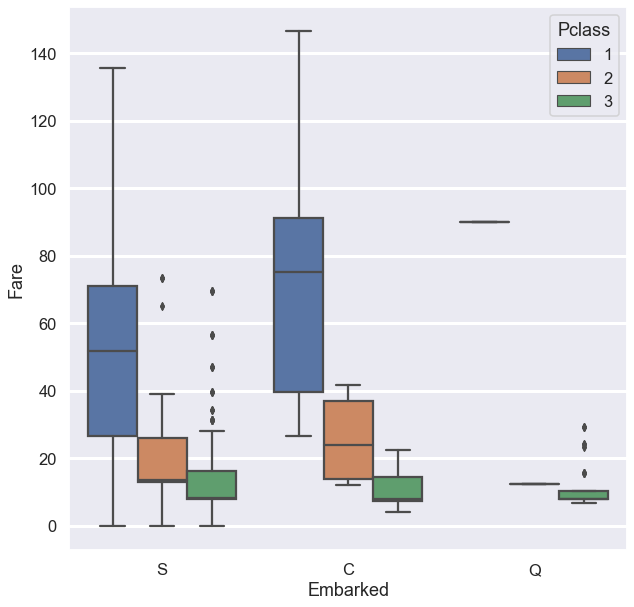

In [129]:
df = train[train['Fare']<train['Fare'].std()*3]
plt.figure(figsize=(10,10))
sns.boxplot(x=df['Embarked'], y=df['Fare'], data=df,hue=df['Pclass'])
#plt.yticks(range(0,550,50))
plt.show()

#### <font color=darkgreen>Inference: Only Embarked C satisfies the condition which is Fare=80 and Pclass=1. Hence, MIssing values for Embarked most likely be equal to C. We could have taken help from Cabin feature to be more sure of Embarked misssing value, but Cabin column contains around 78% missing values.

### Filling embarked missing values with C.

In [130]:
train['Embarked'].fillna('C',inplace=True)

#### Combining train and test data in master dataframe to predict missing values. Lets fetch the first character from cabin column to bettter understand the distribution of Cabin class. 

survivers = train.Survived
train.drop(["Survived"],axis=1, inplace=True)
master=pd.concat([train,test])
master.Cabin.fillna("N", inplace=True)
master['Cabin'] = master['Cabin'].apply(lambda x:list(str(x))[0].upper())
master.head()

#### Titanic has different cabins based on their fare/price and they categorized based on their initial character and then subsequent number. Lets check whether cabin category (i.e. C,E,A,D, etc) has fare range.

In [131]:
survivers = train.Survived
train.drop(["Survived"],axis=1, inplace=True)
master=pd.concat([train,test])
master.Cabin.fillna("N", inplace=True)
master['Cabin'] = master['Cabin'].apply(lambda x:list(str(x))[0].upper())
master.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,N,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,N,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,N,S


In [132]:
master.groupby('Cabin')['Fare'].describe()

,count,mean,std,min,25%,50%,75%,max
Cabin,,,,,,,,
A,22.0,41.244314,20.140358,0.0000,30.1250,35.0771,50.37185,81.8583
B,65.0,122.383078,115.312993,0.0000,57.0000,82.2667,146.52080,512.3292
C,94.0,107.926598,72.912034,25.7000,52.0000,86.2896,151.55000,263.0000
D,46.0,53.007339,28.126283,12.8750,27.7208,52.5542,76.72920,113.2750
E,41.0,54.564634,37.738225,8.0500,26.2875,53.1000,79.65000,134.5000
F,21.0,18.079367,12.215124,7.2292,7.6500,13.0000,26.00000,39.0000
G,5.0,14.205000,3.416419,10.4625,10.4625,16.7000,16.70000,16.7000
N,1013.0,19.132707,27.489412,0.0000,7.8542,10.5000,23.00000,512.3292
T,1.0,35.500000,NaN,35.5000,35.5000,35.5000,35.50000,35.5000


#### Analysing mean, median, and max value we can make a fare range under which Cabin category falls.
- val<=14,<b>Cabin:G</b>
- val=35, <b>Cabin:T</b>
- 14 < val <= 26, <b>Cabin:F</b>
- 26 < val <= 39, <b>Cabin:A</b>
- 39<val<=53, <b>Cabin:E</b>
- 53 < val <= 80, <b>Cabin:D</b>
- 80 < val <= 115, <b>Cabin:C</b>
- ,>115, <b>Cabin:E</b>

#### Function to replace NaN or 'N' value with Above mentioned values.

In [133]:
def repl_N(val):
    n = 0
    if val==35:
        n = 'T'
    elif val<=14:
        n = 'G'
    elif 14<val<=26:
        n='F'
    elif 26<val<=39:
        n='A'
    elif 39<val<=53:
        n='E'
    elif 53<val<=80:
        n='D'
    elif 80<val<=115:
        n='C'
    else:
        n='B'
    return n


### Retriving rows having 'N' values for Cabin replace it with above function values. 

#### Filling Nan/Null value in Fare column which is PassengerId=1044. PassengerId=1044 travelling in Pclass:3 and Embarked:S.

In [134]:

master_N = master[master['Cabin']=='N']
master_notN = master[~(master['Cabin']=='N')]
master_N['Cabin']=master_N['Fare'].apply(lambda x:repl_N(x))
master = pd.concat([master_N,master_notN])
fare_mean= master[(master['Pclass']==3) & (master['Embarked']=='S')]['Fare'].mean()
master['Fare'].fillna(fare_mean,inplace=True)

In [135]:
missing_value = test[(test.Pclass == 3) & 
                     (test.Embarked == "S") & 
                     (test.Sex == "male")].Fare.mean()
## replace the test.fare null values with test.fare mean
test.Fare.fillna(missing_value, inplace=True)

#### Lets split our master dataframe into train and test dataset again, we know training set has 891 rows(passangerId 0-890), and test data has 418 rows (passangerId 892-end) and our master df has 1309 rows.

In [20]:
train = master.sort_values('PassengerId')[:891]
test= master.sort_values('PassengerId')[891:]
train['Survived'] = survivers

#### Missing values in master df, only Age columns has missing values which is ~20.1% or 263 missing values. Survived column has missing values because its not present in test dataset and is expected.

In [21]:
pd.DataFrame([master.isnull().sum(),master.isnull().sum()/len(master)*100]).T.\
rename(columns={0:'Total',1:'Missing Perc'})

,Total,Missing Perc
PassengerId,0.0,0.000000
Pclass,0.0,0.000000
Name,0.0,0.000000
Sex,0.0,0.000000
Age,263.0,20.091673
SibSp,0.0,0.000000
Parch,0.0,0.000000
Ticket,0.0,0.000000
Fare,0.0,0.000000
Cabin,0.0,0.000000


#### Filling Missing values in Age column for master df

#### Creating family size and friends column to make final column which includes count of family members and friends. As we will proceed further we will see this feature is very important in our ml model prediction.

In [22]:
train['family_size'] = train.SibSp + train.Parch+1
test['family_size'] = test.SibSp + test.Parch+1

#### Merging dataframes

#### Drop PassengerId column, it role is same as index column only it starts from 1 and index starts from 0.

In [23]:
passenger_test= test['PassengerId']
train.drop('PassengerId',axis=1,inplace=True)
test.drop('PassengerId',axis=1,inplace=True)

## Function to show values on bar plot

In [24]:
def showvalues(ax,m=None):
    for p in ax.patches:
        ax.annotate("%.1f" % p.get_height(), (p.get_x() + p.get_width() / 2., p.get_height()),\
                    ha='center', va='center', fontsize=14, color='k', rotation=0, xytext=(0, 7),\
                    textcoords='offset points',fontweight='light',alpha=0.9) 

## % of Passenger survived or not w.r.t Sex(Male/Female).

In [25]:
plot_df= train.groupby('Sex')['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
plot_df

,Sex,Survived,percent
0,female,1,74.203822
1,female,0,25.796178
2,male,0,81.109185
3,male,1,18.890815


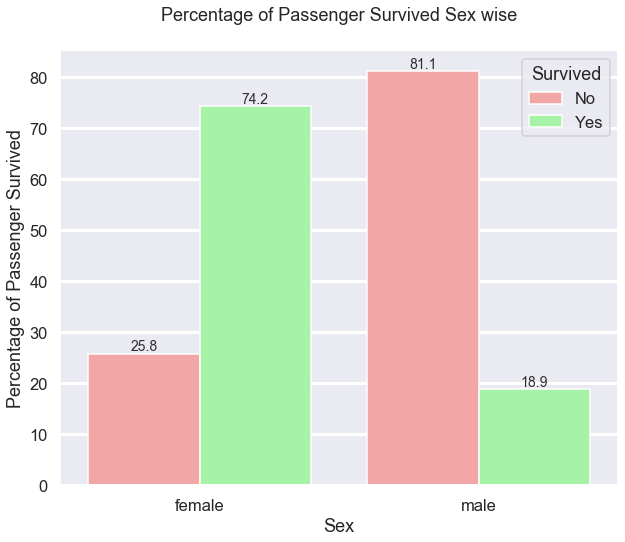

In [26]:
plt.figure(figsize=(10,8))
col = {1:'#99ff99', 0:'#ff9999'}
ax= sns.barplot(x='Sex',y='percent',data=plot_df,hue='Survived',palette=col)
showvalues(ax)
plt.title('Percentage of Passenger Survived Sex wise', pad=30)
plt.xlabel('Sex')
plt.ylabel('Percentage of Passenger Survived')
leg = ax.get_legend().texts
leg[0].set_text("No")
leg[1].set_text("Yes")
plt.show()

#### _<font color=darkgreen>~74% of the female survived whereas ~81% Male Deceased. It's proving Titanic survival ratio are biased towards females(Female passengers were priority rather than male passengers)._

## % of Passenger survived  w.r.t Passenger Class(Lower(3),Middle(2),Upper(1)).

In [27]:
plot_df= train.groupby('Pclass')['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index()
plot_df

,Pclass,Survived,percent
0,1,1,62.962963
1,1,0,37.037037
2,2,0,52.717391
3,2,1,47.282609
4,3,0,75.763747
5,3,1,24.236253


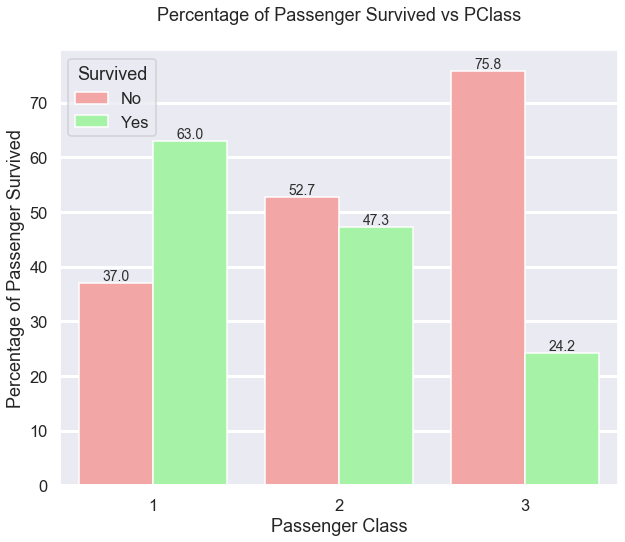

In [28]:
plt.figure(figsize=(10,8))
col = {1:'#99ff99', 0:'#ff9999'}
ax= sns.barplot(x='Pclass',y='percent',data=plot_df,hue='Survived',palette=col)
showvalues(ax)
plt.title("Percentage of Passenger Survived vs PClass", pad=30)
plt.xlabel("Passenger Class");
plt.ylabel("Percentage of Passenger Survived")
leg = ax.get_legend().texts
leg[0].set_text("No")
leg[1].set_text("Yes")
plt.show()

#### _<font color=darkgreen>63% of the people survived in Upper Class, ~47.3% passanger survived in Middle class whereas only ~24% passanger survived in Lower class.(Priority for upper class > middle class> lower class)_

#### Age Distribution of Passengers

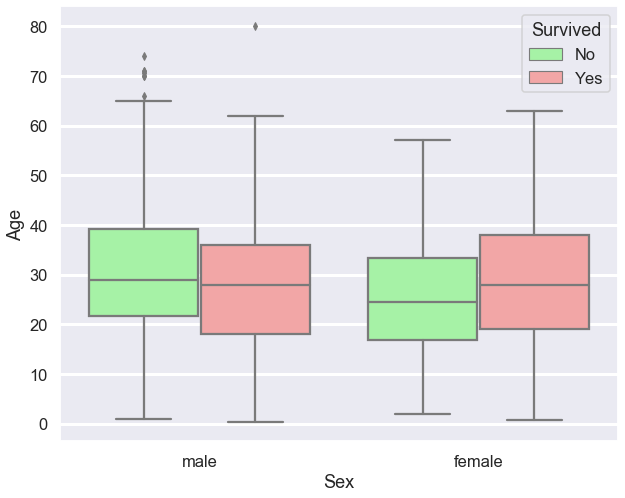

In [29]:
col = {0:'#99ff99', 1:'#ff9999'}
plt.figure(figsize=(10,8))
ax=sns.boxplot(x='Sex',data=train,y='Age',hue='Survived',palette=col)
leg = ax.get_legend().texts
leg[0].set_text("No")
leg[1].set_text("Yes")
plt.show()

#### _<font color='darkgreen'>Younger people survived percentage is more in males while it is opposite in females._

#### Fare distrbution for Pclass and Cabin

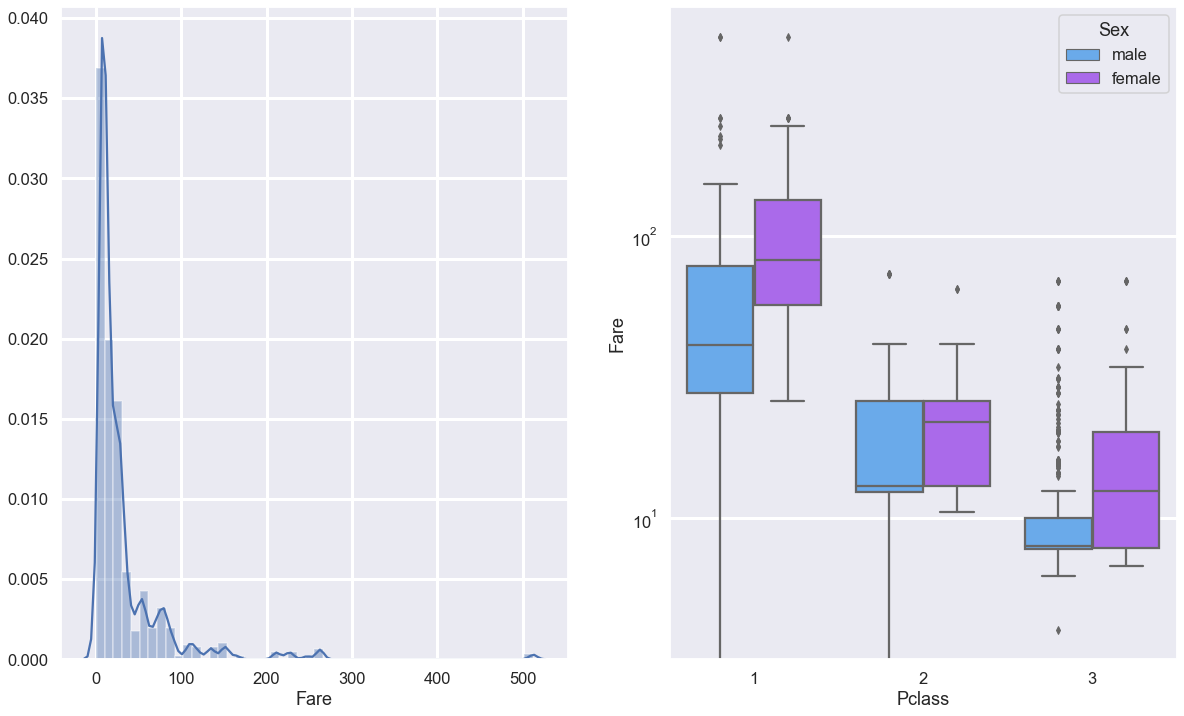

In [30]:
plt.figure(figsize=(20,12))
plt.subplot(1,2,1)
ax=sns.distplot(train['Fare'])
plt.subplot(1,2,2)
ax=sns.boxplot(x='Pclass',data=train,y='Fare',hue='Sex',palette='cool')
ax.set_yscale('log')
plt.show()


#### <font color=darkgreen>PClass has highest fare range and it is somewhat biased, Female passanger in Upper class paid more than male passenger, similarly for Lower class. For middle class, Female employess also paid higher but variation is not that much as for Upper and lower class.

#### Fare and Age distribution vs Survived or not

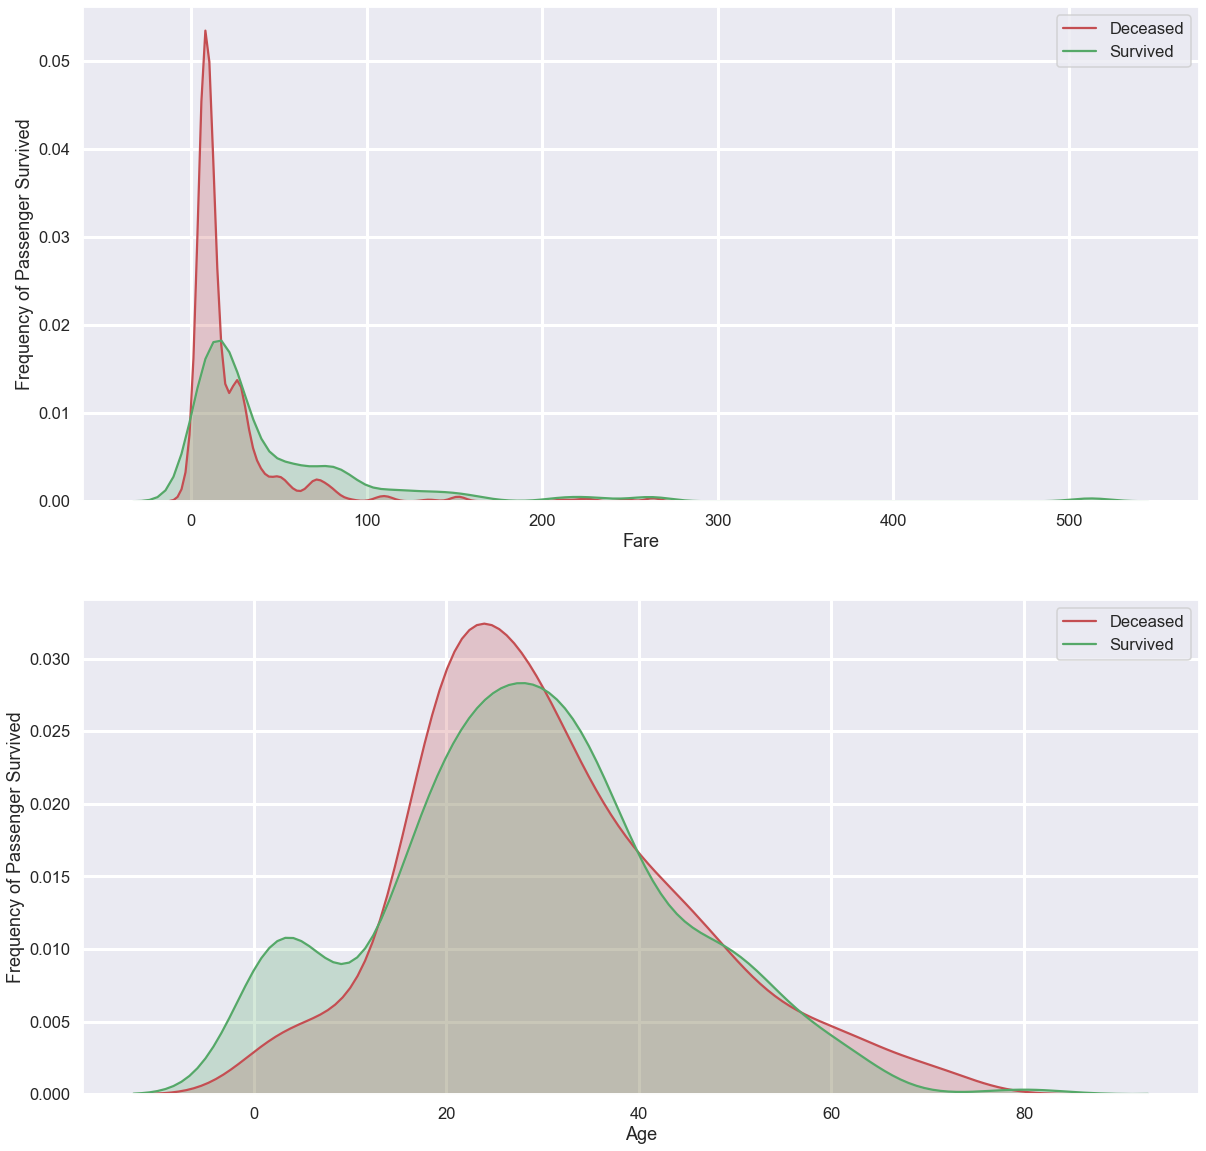

In [31]:
plt.figure(figsize=(20,20))
plt.subplot(2,1,1)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Fare'] , color='r',shade=True,label='Deceased')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Fare'] , color='g',shade=True, label='Survived')
plt.xlabel('Fare')
plt.ylabel('Frequency of Passenger Survived')
plt.subplot(2,1,2)
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'Age'] , color='r',shade=True,label='Deceased')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Age'] , color='g',shade=True, label='Survived')
plt.xlabel('Age')
plt.ylabel('Frequency of Passenger Survived')
plt.show()

#### Inference Fare distribution:
- <b><font color=darkgreen>The spike in the plot under 50 dollar represents that a lot of passengers who bought the ticket within that range did not survive. 
- <b><font color=darkgreen>When fare is approximately more than 200 dollars, there is very small red shade which means, either everyone passed that fare point survived or maybe there is an outlier that clouds our judgment.

#### Inference Age distrbution:
- <b><font color=darkgreen>Children or young infants has more Survived percentage because chidrens and infants were the priority then same as for females which we have seen earlier.

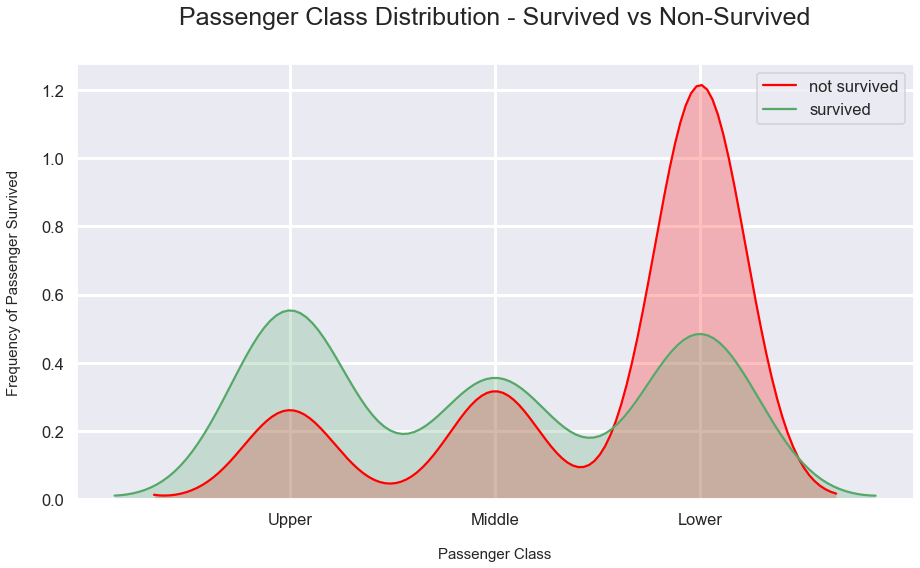

In [32]:
# Kernel Density Plot
fig = plt.figure(figsize=(15,8),)
ax=sns.kdeplot(train.Pclass[train.Survived == 0] , 
               color='red',
               shade=True,
               label='not survived')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'Pclass'] , 
               color='g',
               shade=True, 
               label='survived', 
              )
plt.title('Passenger Class Distribution - Survived vs Non-Survived', fontsize = 25, pad = 40)
plt.ylabel("Frequency of Passenger Survived", fontsize = 15, labelpad = 20)
plt.xlabel("Passenger Class", fontsize = 15,labelpad =20)
## Converting xticks into words for better understanding
labels = ['Upper', 'Middle', 'Lower']
plt.xticks(sorted(train.Pclass.unique()), labels);

#### Lets visulaise Embarked , Sex with Survived percentage

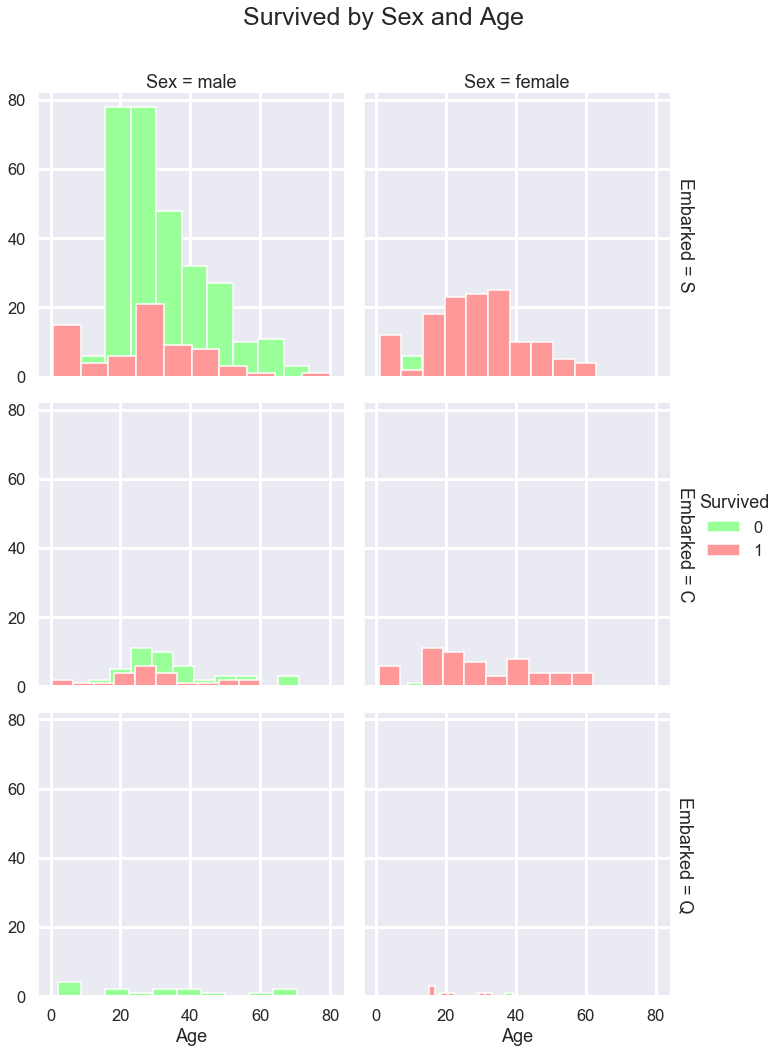

In [33]:

ax = sns.FacetGrid(train,size=5, col="Sex", row="Embarked", margin_titles=True, hue = "Survived",palette = col)
ax = ax.map(plt.hist, "Age", edgecolor = 'white').add_legend()
ax.fig.suptitle("Survived by Sex and Age", size = 25)
plt.subplots_adjust(top=0.90)



#### _<font color=darkgreen>Majority of passengers boarded from Southhampton and then from Cherbourg. Passengers who boarded from Queenstown are very less in number compared to other embarked/port. Majority of the female had survived in which most no of females survived are from southhampton followed by Cherbourgh and Queenstown. Note: No male passenger from queenstown survived, as you can see from the graph._

#### Factorplot for Parents/Children survived for male and female

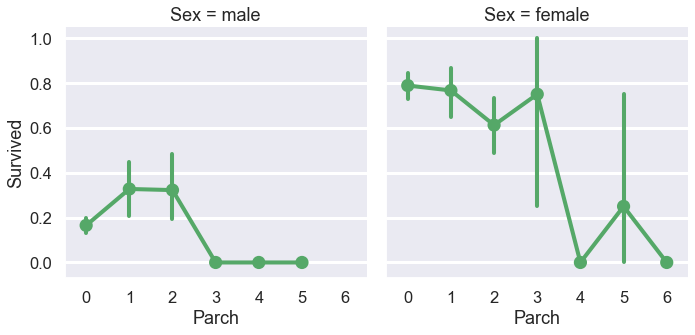

In [34]:

sns.factorplot(x='Parch',y='Survived',data=train,col='Sex',color='g',ci=95.0)

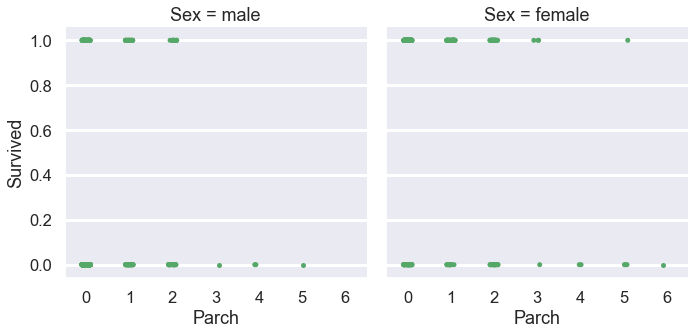

In [35]:

sns.catplot(x='Parch',y='Survived',data=train,col='Sex',color='g')

#### _<font color=darkgreen>Passenger who travelled in big group with their parents and children had less survival rate than who travelled alone or with their parent or childred._
####  _<font color=darkgreen>Femaled who were alone, high percentage of females survived._

#### Factorplot for Spouse/Siblings survived for male and female

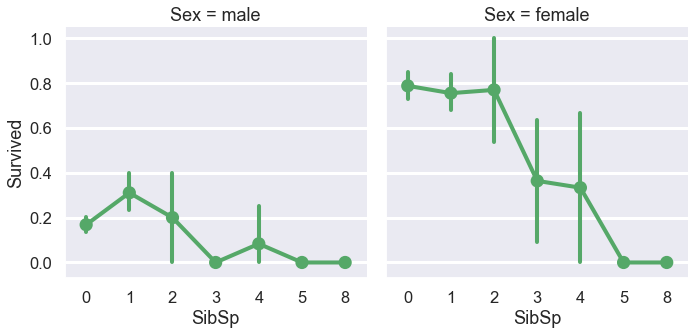

In [36]:

sns.factorplot(x='SibSp',y='Survived',data=train,col='Sex',ci=95.0,color='g')

#### _<font color=darkgreen>Similar Inference as for parent/Children Parch in above plot._

#### Factorplot for Spouse+Siblings+Parents+Childrens+Friend survived for male and female

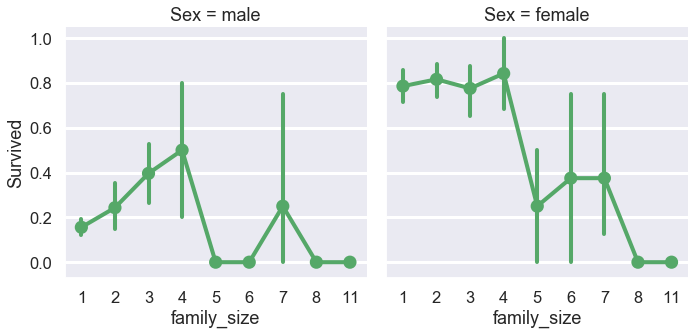

In [37]:

sns.factorplot(x='family_size',y='Survived',data=train,col='Sex',ci=95.0,color='g')

#### Survived passenger vs Cabin

In [38]:
plot_df= train.groupby('Cabin')['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

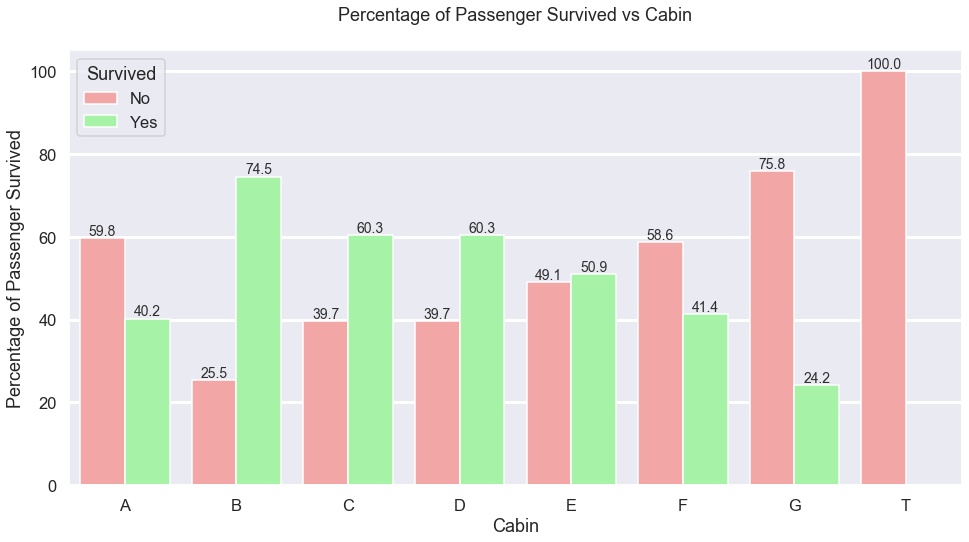

In [39]:
plt.figure(figsize=(16,8))
col = {1:'#99ff99', 0:'#ff9999'}
ax= sns.barplot(x='Cabin',y='percent',data=plot_df,hue='Survived',palette=col)
showvalues(ax)
plt.title("Percentage of Passenger Survived vs Cabin", pad=30)
plt.xlabel("Cabin");
plt.ylabel("Percentage of Passenger Survived")
leg = ax.get_legend().texts
leg[0].set_text("No")
leg[1].set_text("Yes")
plt.show()

#### <font color=darkgreen>Inference:Survived percentage in Cabin B is highest which is 74.5% followed by Cabin D. It's a interesting fact about cabin B. There is only 1 person in cabin T and he didn't survive.

#### Factor Plot for Embarked vs Survived

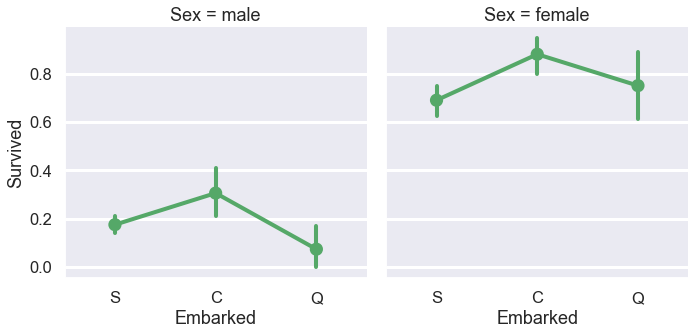

In [40]:

sns.factorplot(x='Embarked',y='Survived',data=train,col='Sex',ci=95.0,color='g')

#### Passengers who boarded from Cherbourg has highest percentage of passenger survived and for Queenstown males survived is very small.

#### Factor Plot for Embarked vs Survived

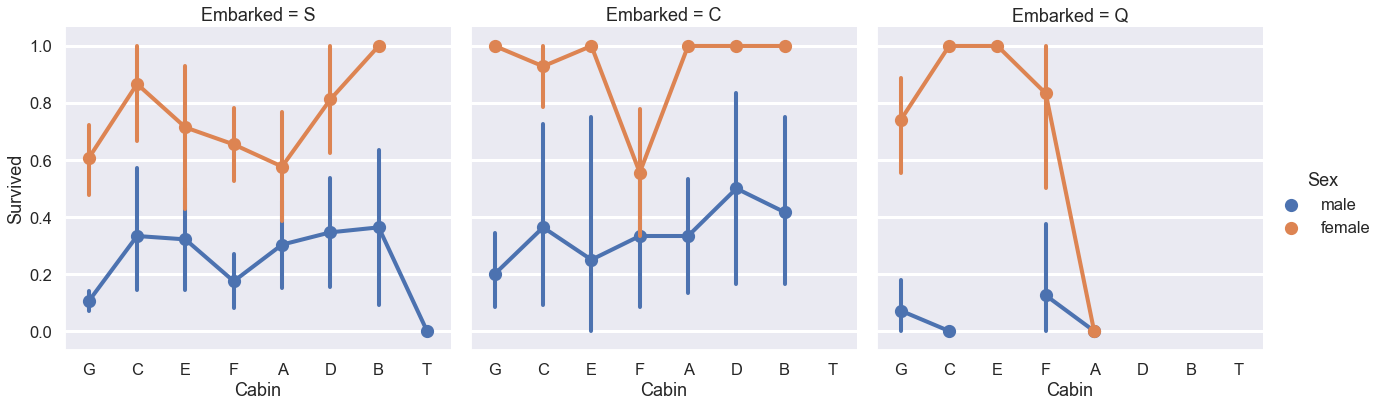

In [41]:

sns.factorplot(x='Cabin',y='Survived',data=train,col='Embarked',hue='Sex',ci=95.0,size=6)

#### _<font color=darkgreen>None of the Passengers Embarked=Q are  in D,B,E,T cabins and D,B,E has high survived percentage. We noticed that very small fraction of male survived who boarded from Queenstown as seen earlier also. Females have greater survived percentage than males._

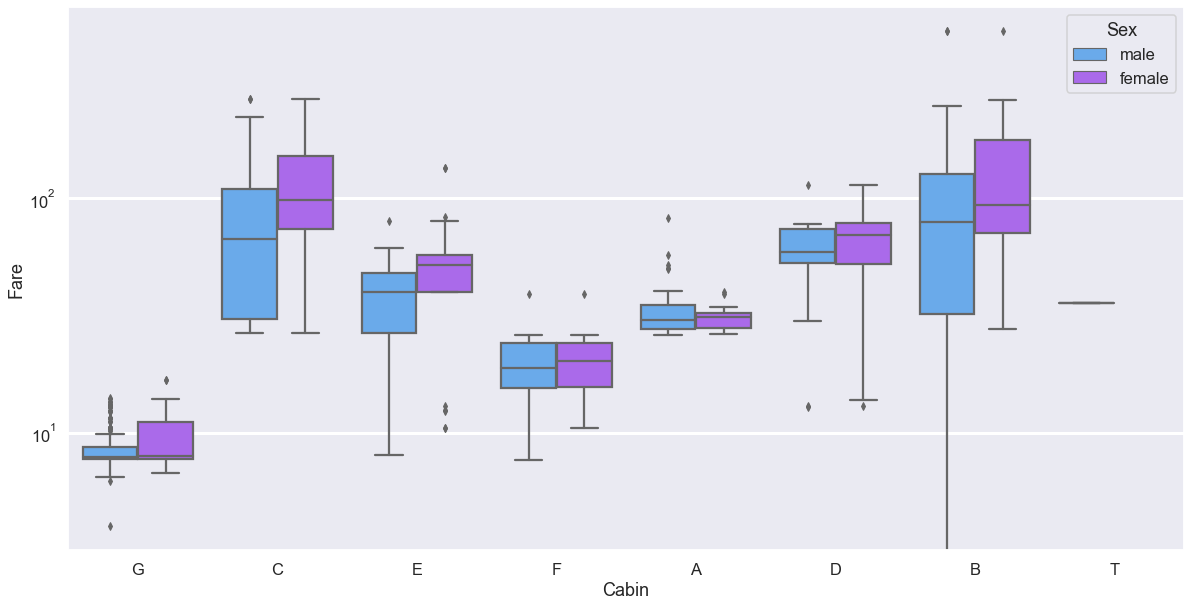

In [42]:
plt.figure(figsize=(20,10))
ax=sns.boxplot(x='Cabin',data=train,y='Fare',hue='Sex',palette='cool')
ax.set_yscale('log')
plt.show()


#### _<font color=darkgreen>Cabins C, B, and D has high fare amount, also we saw previusly Cabin C,D and B has gretaer survived percentage than other cabins. It is because who paid higher amount for  fare are likely to be more priority to save than passenger who paid smaller amount._

#### Lets see if childrens or you infants were the priority and if it is what is the impact on young childrens/infants

In [43]:
plot_df= train[train['Age']<10]['Survived'].value_counts(normalize=True).mul(100).rename('percent').reset_index()

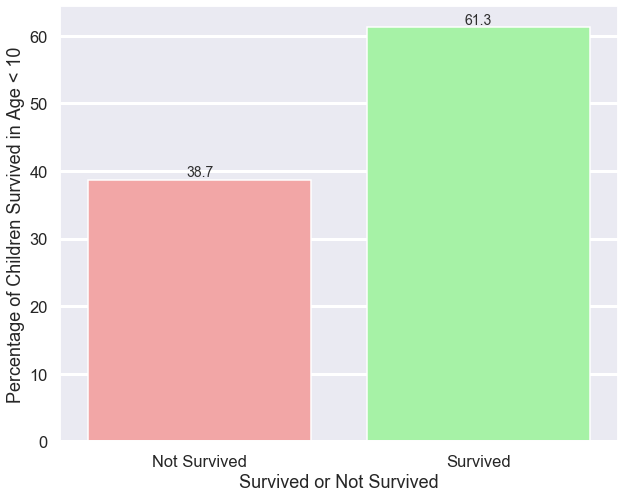

In [44]:
plt.figure(figsize=(10,8))
ax=sns.barplot(x=plot_df['index'],y=plot_df['percent'],palette=col)
locs, labels = plt.xticks()
plt.xticks(ticks=locs,labels=['Not Survived','Survived'])
plt.ylabel('Percentage of Children Survived in Age < 10')
plt.xlabel('Survived or Not Survived')
showvalues(ax)

#### _<font color=darkgreen>For Age<10 (Childrens/Infants) Survived percentage is 61% which shows that good percentage of children age<10 survived as children and females were first priority._

In [45]:
train['Survived'].value_counts(normalize=True)*100

0    61.616162
1    38.383838
Name: Survived, dtype: float64

#### Male passenged survived percentage who embarked from Queenstown

In [46]:
train[(train['Embarked']=='Q') & (train['Sex']=='male')]['Survived'].value_counts()

0    38
1     3
Name: Survived, dtype: int64

In [47]:
train[(train['Embarked']=='Q') & (train['Sex']=='male')]['Survived'].value_counts(normalize=True)*100

0    92.682927
1     7.317073
Name: Survived, dtype: float64

## Inferences from above visualisations:
- <b><font color=darkgreen>~38% passenger survived.
- ~74% female passenger survived, while only ~19% male passenger survived.
- ~63% upper class passengers survived, 47% middle class passenger survived, while only 24% lower class passenger survived.
- Passenger who is in Cabin B, 75% of the passenger in Cabin B survived, will find out reason behind it.
- Most of the passenger embarked from Cherbourg and Southhampton, very few passenger embarked from Queenstown and more than 90% male passenger died who boarder from Queesntown.
- ~61% of the children survived below Age 10, were on priority to save.
- Small family size has more survived percentage compared to medium and big family size.


#### Correlation between different features, how they are correlates( strongly(positive) , neutral, or weakely(negative))

In [48]:
train['Sex'] = train.Sex.apply(lambda x: 0 if x == "female" else 1)
test['Sex'] = test.Sex.apply(lambda x: 0 if x == "female" else 1)

In [49]:
plot_df

,index,percent
0,1,61.290323
1,0,38.709677


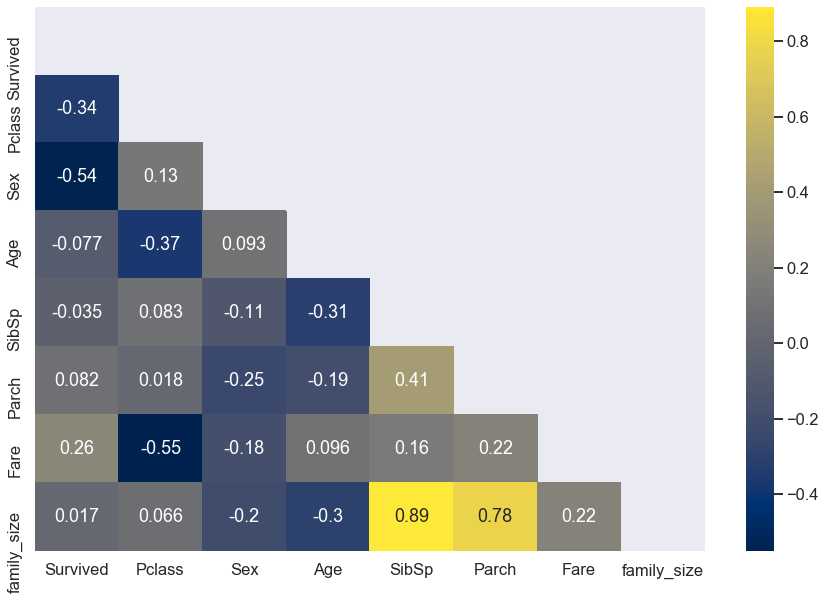

In [50]:
plot_df=train[['Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked',
       'family_size']]
plt.figure(figsize=(15,10))
mask = np.zeros_like(plot_df.corr(), dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(plot_df.corr(),annot=True,cmap='cividis',mask=mask)

#### Inference from Coorelation:
- <b><font color=darkgreen>Fare and Survived are positively correlated(0.26)
- Fare and Pclass are negatively correlated(-0.55)
- Survived and Passenger Class are negatively correlated(-0.34)
- Survived and Sex are negatively correlated(-0.54)
- Passenger Class and Age are negatively correlated(-0.37)



## Feature Engineering

# Name

In [51]:
np.info([len(i) for i in train.Name])

Built-in mutable sequence.

If no argument is given, the constructor creates a new empty list.
The argument must be an iterable if specified.


In [52]:
train['name_len'] = [len(i) for i in train.Name]
test['name_len'] = [len(i) for i in test.Name]
def name_length(size):
    a = ''
    if (size <=20):
        a = 'short'
    elif (size <=35):
        a = 'medium'
    elif (size <=50):
        a = 'long'
    else:
        a = 'very long'
    return a
train['name_len_rnge'] = train['name_len'].map(name_length)
test['name_len_rnge'] = test['name_len'].map(name_length)

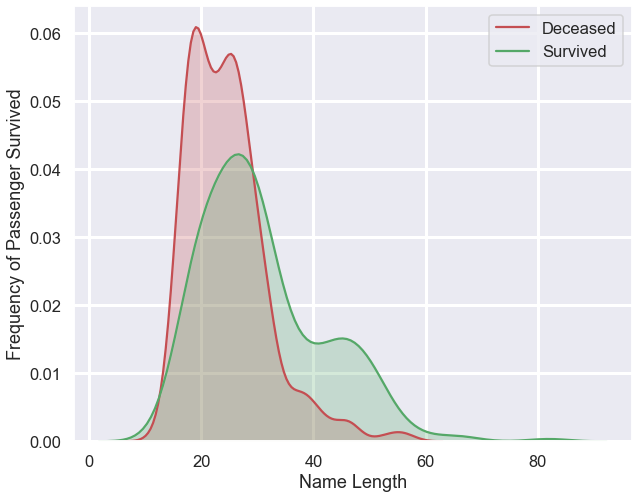

In [53]:
plt.figure(figsize=(10,8))
ax=sns.kdeplot(train.loc[(train['Survived'] == 0),'name_len'] , color='r',shade=True,label='Deceased')
ax=sns.kdeplot(train.loc[(train['Survived'] == 1),'name_len'] , color='g',shade=True, label='Survived')
plt.xlabel('Name Length')
plt.ylabel('Frequency of Passenger Survived')
plt.show()

#### _<font color=darkgreen>Inference: for long and very long Name length, Survived percentage is much larger than deceased, which is a great insight from length feature._

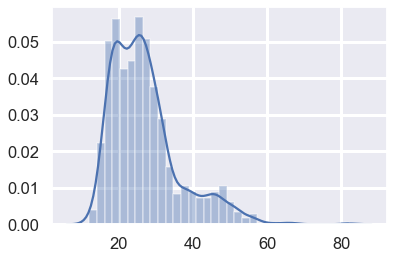

In [54]:
sns.distplot([len(i) for i in train.Name])

#### Fetching title from Name

In [55]:
train['title']=train['Name'].apply(lambda x:x.split('.')[0].split(',')[1].strip())
test['title']=test['Name'].apply(lambda x:x.split('.')[0].split(',')[1].strip())

#### Lets replace Mlle(Mademoiselle) to Miss, Ms to Miss, Mme(Madame) to Mrs, and  Colonel,Don,jonkheer,the Countess,Major relaced with rank.

In [56]:
## we are writing a function that can help us modify title column
def replace_title(df):
    
    result=[]
    for val in df:
        if val in ['the Countess','Capt','Lady','Sir','Jonkheer','Don','Major','Col','Dona']:
            val = 'rare'
            result.append(val)
        elif val in ['Ms', 'Mlle']:
            val = 'Miss'
            result.append(val)
        elif val == 'Mme':
            val = 'Mrs'
            result.append(val)
        else:
            result.append(val)
    return result

train['title']=replace_title(train['title'])
test['title']=replace_title(test['title'])

In [57]:
train['title'].value_counts()

Mr        517
Miss      185
Mrs       126
Master     40
rare       10
Dr          7
Rev         6
Name: title, dtype: int64

#### Unique name titles

In [58]:
print(train['title'].unique())
print(test['title'].unique())

['Mr' 'Mrs' 'Miss' 'Master' 'rare' 'Rev' 'Dr']
['Mr' 'Mrs' 'Miss' 'Master' 'rare' 'Rev' 'Dr']


#### Family Size including friends range

In [59]:
## bin the family size. 
def family_group(size):
    """
    This funciton groups(loner, small, large) family based on family size
    """
    
    a = ''
    if (size <= 1):
        a = 'loner'
    elif (size <= 4):
        a = 'small'
    else:
        a = 'large'
    return a

train['family_size_inc_frnds_rng'] = train['family_size_inc_frnds'].map(family_group)
test['family_size_inc_frnds_rng'] = test['family_size_inc_frnds'].map(family_group)

In [60]:

train['family_group'] = train['family_size'].map(family_group)
test['family_group'] = test['family_size'].map(family_group)

In [61]:
train['is_alone'] = [1 if i<2 else 0 for i in train.family_size]
test['is_alone'] = [1 if i<2 else 0 for i in test.family_size]

#### Actual_fare, passenger who are with family have paid total fare not the individual fare as seen from the fare column. We will derive individual fare columns because fare is very important parameter in prediction of passengger survived or not.

In [62]:
train['actual_fare']=train['Fare']/train.family_size
test['actual_fare'] = test.Fare/test.family_size

#### Fare Range

In [63]:
train['Fare'].describe()

count    891.000000
mean      32.204208
std       49.693429
min        0.000000
25%        7.910400
50%       14.454200
75%       31.000000
max      512.329200
Name: Fare, dtype: float64

In [64]:
def fare_rnge(fare):
    val= ''
    if fare <= 4:
        val = 'very_low'
    elif fare <= 10:
        val = 'low'
    elif fare <= 20:
        val = 'mid'
    elif fare <= 45:
        val = 'high'
    else:
        val = 'very_high'
    return val

train['fare_rnge'] = train['actual_fare'].map(fare_rnge)
test['fare_rnge'] = test['actual_fare'].map(fare_rnge)

In [65]:
## create bins for age
#def age_group_fun(age):
#    """
#    This function creates a bin for age
#    """
#    a = ''
#    if age <= 1:
#        a = 'infant'
#    elif age <= 4: 
#        a = 'toddler'
#    elif age <= 13:
#        a = 'child'
#    elif age <= 18:
#        a = 'teenager'
#    elif age <= 35:
#        a = 'Young_Adult'
#    elif age <= 45:
#        a = 'adult'
#    elif age <= 55:
#        a = 'middle_aged'
#    elif age <= 65:
#        a = 'senior_citizen'
#    else:
#        a = 'old'
#    return a
        
## Applying "age_group_fun" function to the "Age" column.
#train['age_group'] = train['Age'].map(age_group_fun)
#test['age_group'] = test['Age'].map(age_group_fun)

## Creating dummies for "age_group" feature. 
#train = pd.get_dummies(train,columns=['age_group'], drop_first=True)
#test = pd.get_dummies(test,columns=['age_group'], drop_first=True);

#### Creating more columns and converting catrgorical columns into dummy variable. So, we can use it in ML model.

In [66]:
train = pd.get_dummies(train, columns=['Pclass', 'Cabin', 'Embarked', 'name_len_rnge', 'title',\
                                       'fare_rnge','family_group'], drop_first=False)
test = pd.get_dummies(test, columns=['Pclass', 'Cabin', 'Embarked', 'name_len_rnge',\
                                     'title','fare_rnge','family_group'], drop_first=False)


#### Dropping columns which are not useful after creating dummy variables

train.drop(['family_size','Friends', 'family_size_inc_frnds','name_len',\
            'Fare','Ticket_num','Ticket','Name'], axis=1, inplace=True)
test.drop(['family_size','Friends', 'family_size_inc_frnds','name_len',\
            'Fare','Ticket_num','Ticket','Name'], axis=1, inplace=True)

In [67]:
train.drop(['family_size','name_len',\
            'Fare','Name','Ticket'], axis=1, inplace=True)
test.drop(['family_size','name_len',\
            'Fare','Name','Ticket'], axis=1, inplace=True)

#### Predicting missing value for Age columns

In [68]:
def predict_age(df):
    df_not_null = df.loc[df['Age'].notnull()]
    df_null= df[df['Age'].isnull()]
    y=df_not_null['Age']
    x=df_not_null.drop('Age',axis=1)
    rf_reg=RandomForestRegressor(n_estimators=1000).fit(x,y)
    pred=rf_reg.predict(df_null.drop('Age',axis=1))
    df.loc[df.Age.isnull(), "Age"] =list(pred)
    return df
predict_age(train)
predict_age(test)
    

,Sex,Age,SibSp,Parch,is_alone,actual_fare,Pclass_1,Pclass_2,Pclass_3,Cabin_A,Cabin_B,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Cabin_G,Embarked_C,Embarked_Q,Embarked_S,name_len_rnge_long,name_len_rnge_medium,name_len_rnge_short,name_len_rnge_very long,title_Dr,title_Master,title_Miss,title_Mr,title_Mrs,title_Rev,title_rare,fare_rnge_high,fare_rnge_low,fare_rnge_mid,fare_rnge_very_high,fare_rnge_very_low,family_group_large,family_group_loner,family_group_small
0,1,34.500000,0,0,1,7.829200,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
1,0,47.000000,1,0,0,3.500000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1
2,1,62.000000,0,0,1,9.687500,0,1,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
3,1,27.000000,0,0,1,8.662500,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
4,0,22.000000,1,1,0,4.095833,0,0,1,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1,23.296187,0,0,1,8.050000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
414,0,39.000000,0,0,1,108.900000,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0
415,1,38.500000,0,0,1,7.250000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0
416,1,23.296187,0,0,1,8.050000,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0


## Preprocessing Tasks

#### Splitting data into train and test data 

In [69]:
X = train.drop(['Survived'], axis = 1)
y = train["Survived"]

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

#### Feature Scaling preprocessing step
<ul>
    <li><b>MinMaxScaler</b>-Scales the data using the max and min values so that it fits between 0 and 1.</li>
    <li><b>StandardScaler</b>-Scales the data so that it has mean 0 and variance of 1.</li>
    <li><b>RobustScaler</b>-Scales the data similary to Standard Scaler, but makes use of the median and scales using the interquertile range so as to aviod issues with large outliers.</b>
 </ul>

In [71]:
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)

### Data Modeling and Evaluation

In [72]:
from sklearn.linear_model import LogisticRegression
lr= LogisticRegression(solver='liblinear',penalty= 'l1',random_state = 0)
lr.fit(X_train,y_train)
y_pred = lr.predict(X_test)
y_prob = lr.predict_proba(X_test)
print(accuracy_score(y_test, y_pred))
print(precision_score(y_test, y_pred))
print(recall_score(y_test, y_pred)) 

0.832089552238806
0.7722772277227723
0.78


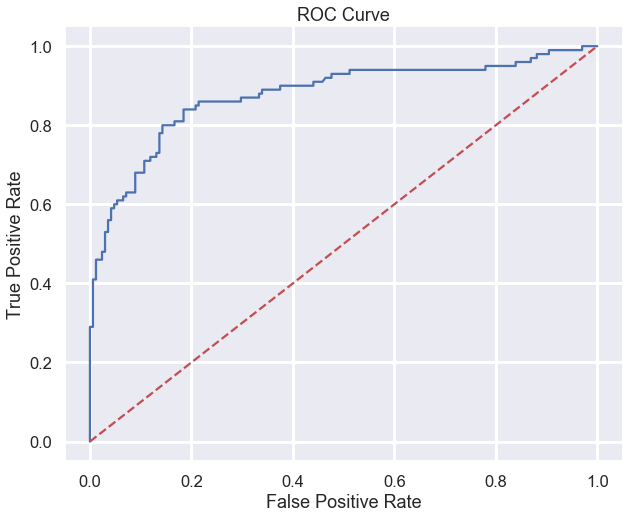

In [73]:
from sklearn.metrics import roc_auc_score,auc,roc_curve
fpr, tpr, _ =roc_curve(y_test,y_prob[:,1])
roc_auc= auc(fpr,tpr)
plt.figure(figsize=(10,8))
plt.plot(fpr,tpr,label='ROC Curve(area = %0.2f)'%roc_auc)
plt.plot([0,1],[0,1],'k--',c='r')
plt.xlabel('False Positive Rate', fontsize = 18)
plt.ylabel('True Positive Rate', fontsize = 18)
plt.title('ROC Curve', fontsize= 18)
plt.show()

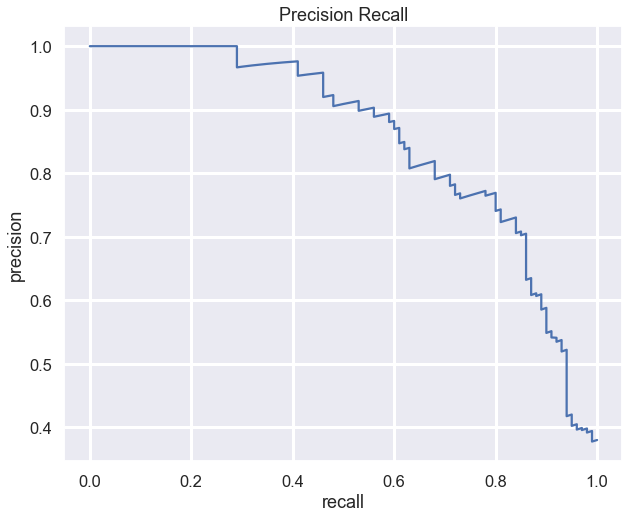

In [74]:
precision,recall,thre=precision_recall_curve(y_test,y_prob[:,1])
prec_recall= auc(recall,precision)
plt.figure(figsize=(10,8))
plt.plot(recall,precision,label='Precision recall Curve(area = %0.2f)'%prec_recall)
plt.xlabel('recall', fontsize = 18)
plt.ylabel('precision', fontsize = 18)
plt.title('Precision Recall', fontsize= 18)
plt.show()

In [75]:
cv=StratifiedShuffleSplit(n_splits=20,test_size=0.3,random_state=0)
cross_v_score= cross_val_score(LogisticRegression(),X,y,cv=cv)
print(cross_v_score)
print('mean cross validation score:{0:2.2f}'.format(np.mean(cross_v_score)))

[0.80970149 0.82089552 0.82835821 0.80970149 0.80970149 0.86567164
 0.85447761 0.81716418 0.82462687 0.78731343 0.83955224 0.82462687
 0.81343284 0.80597015 0.84701493 0.80223881 0.84701493 0.84328358
 0.84328358 0.80970149]
mean cross validation score:0.83


In [76]:
from sklearn.model_selection import GridSearchCV, StratifiedKFold

c = list(np.linspace(0.01,10,19))
penalties = ['l1','l2']
cv = StratifiedShuffleSplit(n_splits = 10, test_size = .3)
param = {'penalty': penalties, 'C': c}
logreg = LogisticRegression(solver='liblinear')
grid = RandomizedSearchCV(estimator=LogisticRegression(), 
                           param_distributions = param,
                           scoring = 'accuracy',
                           cv = cv,n_iter=40
                          )
## Fitting the model
grid.fit(X, y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.3,
            train_size=None),
                   error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0,...rt=False),
                   iid='deprecated', n_iter=40, n_jobs=None,
                   param_distributions={'C': [0.01, 0.5650000000000001, 1.12,
                                              1.675, 2.23, 2.785, 3.34, 3.895,
              

In [77]:
print(grid.best_estimator_)
print(grid.best_params_)
print(grid.best_score_)
print(grid.best_index_)

LogisticRegression(C=0.5650000000000001, class_weight=None, dual=False,
                   fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                   max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)
{'penalty': 'l2', 'C': 0.5650000000000001}
0.828731343283582
3


In [78]:
lr=grid.best_estimator_
lr.score(X,y)

0.8316498316498316

## KNN

In [79]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
knn.fit(X_train,y_train)
y_predict=knn.predict(X_test)
accuracy_score(y_test,y_predict)

0.8022388059701493

## Naive Bayes - Baseline Model

In [80]:
from sklearn.naive_bayes import MultinomialNB
g_nb=MultinomialNB()
g_nb.fit(X,y)
y_pred= g_nb.predict(X_test)
print(round(accuracy_score(y_test,y_pred),3))


0.799


## Support Vector Machine

In [81]:
from sklearn.svm import SVC
svm_n=SVC(C=3,kernel='poly',degree=3)
svm_n.fit(X_train,y_train)
y_pred= svm_n.predict(X_test)
accuracy_score(y_test,y_pred)

0.832089552238806

## Decision tree Classifier

In [82]:
from sklearn.tree import DecisionTreeClassifier
max_depth_n = range(1,10)
max_feature_n = [20,21,22,23,24,25,26,28,29,30,'auto']
criterion_n = ["gini", "entropy"]
params={'max_depth':max_depth_n,'max_features':max_feature_n,'criterion':criterion_n}
cv_n=StratifiedShuffleSplit(test_size=0.25,random_state=0)
random_cv= RandomizedSearchCV(DecisionTreeClassifier(),param_distributions=params,cv=cv_n)
random_cv.fit(X,y)

RandomizedSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.25,
            train_size=None),
                   error_score=nan,
                   estimator=DecisionTreeClassifier(ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                         

In [83]:
print(random_cv.best_estimator_)
print(random_cv.best_index_)
print(random_cv.best_params_)
print(random_cv.best_score_)


DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=4, max_features=30, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')
2
{'max_features': 30, 'max_depth': 4, 'criterion': 'gini'}
0.8327354260089684


In [84]:
dtc=random_cv.best_estimator_
dtc.score(X,y)


0.8529741863075196

## Feature Importance 

In [85]:
columns= X.columns
feature_importances = pd.DataFrame(dtc.feature_importances_,
                                   index = columns,
                                    columns=['Feature Importance'])
feature_importances.sort_values(by='Feature Importance', ascending=False).head(10)

,Feature Importance
title_Mr,0.584680
family_group_large,0.136775
actual_fare,0.048935
Age,0.046854
Pclass_3,0.046280
Pclass_1,0.044392
title_Rev,0.043847
fare_rnge_low,0.040427
Pclass_2,0.007810
title_Dr,0.000000


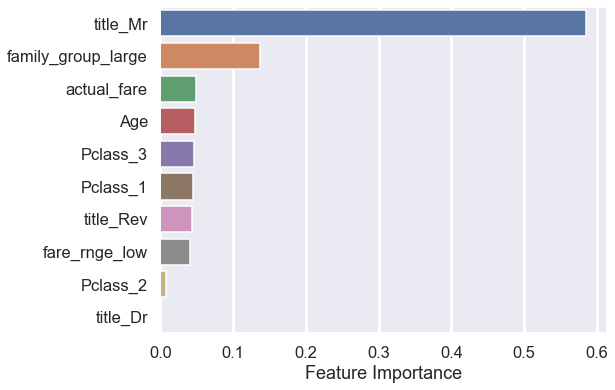

In [86]:
df_temp= feature_importances.sort_values(by='Feature Importance', ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=df_temp,y=df_temp.index, x='Feature Importance',orient='h')
#bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Random Forest Classifier

In [87]:
from sklearn.ensemble import RandomForestClassifier
n_estimators_n=[145,150]
max_depth_n=range(1,10)
criterion_n = ["gini", "entropy"]
params={'max_depth':max_depth_n,'criterion':criterion_n,'n_estimators':n_estimators_n}
cv_n=StratifiedShuffleSplit(test_size=0.25,random_state=0)
grid_cv= GridSearchCV(RandomForestClassifier(),param_grid=params)
grid_cv.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              ra

In [88]:
print(grid_cv.best_estimator_)
print(grid_cv.best_params_)
print(grid_cv.best_score_)


RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=9, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=145,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)
{'criterion': 'gini', 'max_depth': 9, 'n_estimators': 145}
0.8473918774715964


In [89]:
rfc=grid_cv.best_estimator_
rfc.score(X,y)

0.9337822671156004

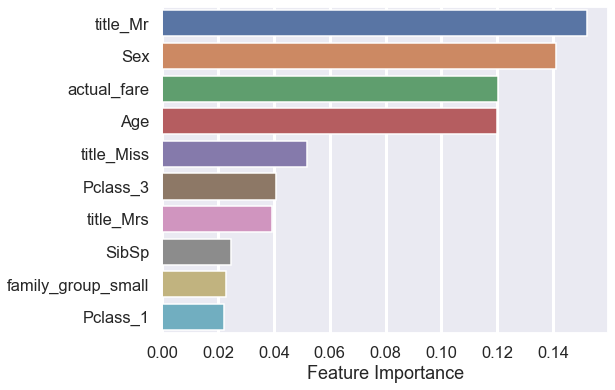

In [90]:
columns= X.columns
feature_importances = pd.DataFrame(rfc.feature_importances_,
                                   index = columns,
                                    columns=['Feature Importance'])
feature_importances.sort_values(by='Feature Importance', ascending=False).head(10)
df_temp= feature_importances.sort_values(by='Feature Importance', ascending=False).head(10)
plt.figure(figsize=(8,6))
sns.barplot(data=df_temp,y=df_temp.index, x='Feature Importance',orient='h')
#bar.set_xticklabels(bar.get_xticklabels(), rotation=45, horizontalalignment='right')
plt.show()

## Bagging Classifier

In [91]:
from sklearn.ensemble import BaggingClassifier
n_estimators_n = [10,20,30,50,70,80,100,120, 140,150]
cv_n=StratifiedShuffleSplit(test_size=0.25,random_state=0)
params={'n_estimators':n_estimators_n}
grid_cv= GridSearchCV(BaggingClassifier(),param_grid=params,cv=cv_n)
grid_cv.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=BaggingClassifier(base_estimator=None, bootstrap=True,
                                         bootstrap_features=False,
                                         max_features=1.0, max_samples=1.0,
                                         n_estimators=10, n_jobs=None,
                                         oob_score=False, random_state=None,
                                         verbose=0, warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [10, 20, 30, 50, 70, 80, 100, 120, 140,
                                          150]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [92]:
print(grid_cv.best_estimator_)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

BaggingClassifier(base_estimator=None, bootstrap=True, bootstrap_features=False,
                  max_features=1.0, max_samples=1.0, n_estimators=150,
                  n_jobs=None, oob_score=False, random_state=None, verbose=0,
                  warm_start=False)
{'n_estimators': 150}
0.8309417040358745


In [93]:
bc_n=grid_cv.best_estimator_
bc_n.score(X,y)

0.9943883277216611

In [94]:
bc=BaggingClassifier(n_estimators=30,max_features=17)
bc.fit(X_train,y_train)
y_pred=bc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8470149253731343

## Gradient Boosting Classifier

In [95]:
from sklearn.ensemble import GradientBoostingClassifier
max_depth_n=range(2,10)
params={'max_depth':max_depth_n}
cv_n=StratifiedShuffleSplit(test_size=0.25,random_state=0)
grid_cv= GridSearchCV(GradientBoostingClassifier(),param_grid=params)
grid_cv.fit(X,y)

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.1,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_no_change=None,
      

In [96]:
print(grid_cv.best_estimator_)
print(grid_cv.best_params_)
print(grid_cv.best_score_)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=100,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)
{'max_depth': 5}
0.8395016006528152


In [97]:
gbc=grid_cv.best_estimator_
gbc.score(X,y)

0.9663299663299664

## XGB Classifier

In [98]:
from xgboost import XGBClassifier
xgbc=XGBClassifier()
xgbc.fit(X_train,y_train)
y_pred=xgbc.predict(X_test)
print(round(accuracy_score(y_test,y_pred),2))

0.83


## Ada Boost Algorithm

In [99]:
from sklearn.ensemble import AdaBoostClassifier
n_estimators_n = [50,70,80,100]
cv_n=StratifiedShuffleSplit(test_size=0.25,random_state=0)
params = {'n_estimators':n_estimators_n}
grid_cv= GridSearchCV(AdaBoostClassifier(),param_grid=params,cv=cv_n)
grid_cv.fit(X,y)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=0, test_size=0.25,
            train_size=None),
             error_score=nan,
             estimator=AdaBoostClassifier(algorithm='SAMME.R',
                                          base_estimator=None,
                                          learning_rate=1.0, n_estimators=50,
                                          random_state=None),
             iid='deprecated', n_jobs=None,
             param_grid={'n_estimators': [50, 70, 80, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [100]:
print(grid_cv.best_estimator_)
print(grid_cv.best_score_)
print(grid_cv.best_params_)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=50, random_state=None)
0.8174887892376683
{'n_estimators': 50}


In [101]:
abc_n=grid_cv.best_estimator_
abc_n.score(X,y)

0.8406285072951739

In [102]:
abc=AdaBoostClassifier(algorithm='SAMME.R',learning_rate=1.007)
abc.fit(X_train,y_train)
y_pred=abc.predict(X_test)
accuracy_score(y_test,y_pred)

0.8208955223880597

## Extra Tree Classifier

In [103]:
from sklearn.ensemble import ExtraTreesClassifier
etc=ExtraTreesClassifier()
etc.fit(X_train,y_train)
y_pred=etc.predict(X_test)
print(round(accuracy_score(y_test,y_pred),2))

0.83


## Gaussian Process Classifier

In [104]:
from sklearn.gaussian_process import GaussianProcessClassifier
gpc=GaussianProcessClassifier()
gpc.fit(X_train,y_train)
y_pred=gpc.predict(X_test)
print(round(accuracy_score(y_test,y_pred),2))

0.82


## Voting Classifier

In [105]:
from sklearn.ensemble import VotingClassifier
vc= VotingClassifier(estimators=[lr,rfc,gbc,knn,bc,abc,etc,gpc,g_nb])

vc = VotingClassifier(estimators=[
    ('lr_grid', lr),
    ('random_forest', rfc),
    ('gradient_boosting', gbc),
    ('decision_tree_grid',dtc),
    ('knn_classifier', knn),
    ('XGB_Classifier', xgbc),
    ('bagging_classifier', bc),
    ('adaBoost_classifier',abc),
    ('ExtraTrees_Classifier', etc),
    ('gaussian_process_classifier', gpc)
],voting='hard')
vc.fit(X_train,y_train)
y_pred=vc.predict(X_test)
print(round(accuracy_score(y_test,y_pred),2))

0.86


## Artificial Neural Network

In [106]:
from tensorflow.keras.models import Sequential 
from tensorflow.keras.layers import Dense,Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dropout
#Early Stop
early_stop = EarlyStopping(monitor = 'val_loss', mode = "min", verbose = 1 , patience = 25)

ann= Sequential()

ann.add(Dense(9,activation = 'relu'))
ann.add(Dropout(0.5))
ann.add(Dense(4,activation = 'relu'))
ann.add(Dropout(0.5))

ann.add(Dense(1,activation='sigmoid'))
ann.compile(loss= 'binary_crossentropy', optimizer = 'adam')

ann.fit(x=X_train, y=y_train,epochs=400,validation_data=(X_test,y_test),callbacks=[early_stop])

Epoch 1/400
20/20 [==============================] - 0s 10ms/step - loss: 1.0609 - val_loss: 0.7817
Epoch 2/400
20/20 [==============================] - 0s 3ms/step - loss: 0.9358 - val_loss: 0.7316
Epoch 3/400
20/20 [==============================] - 0s 6ms/step - loss: 0.8530 - val_loss: 0.7046
Epoch 4/400
20/20 [==============================] - 0s 5ms/step - loss: 0.7845 - val_loss: 0.6891
Epoch 5/400
20/20 [==============================] - 0s 6ms/step - loss: 0.7769 - val_loss: 0.6773
Epoch 6/400
20/20 [==============================] - 0s 4ms/step - loss: 0.7436 - val_loss: 0.6685
Epoch 7/400
20/20 [==============================] - 0s 5ms/step - loss: 0.6756 - val_loss: 0.6624
Epoch 8/400
20/20 [==============================] - 0s 4ms/step - loss: 0.7085 - val_loss: 0.6579
Epoch 9/400
20/20 [==============================] - 0s 3ms/step - loss: 0.6961 - val_loss: 0.6543
Epoch 10/400
20/20 [==============================] - 0s 3ms/step - loss: 0.6981 - val_loss: 0.6518
Epoch 11

Epoch 83/400
20/20 [==============================] - 0s 4ms/step - loss: 0.5244 - val_loss: 0.4557
Epoch 84/400
20/20 [==============================] - 0s 6ms/step - loss: 0.4888 - val_loss: 0.4531
Epoch 85/400
20/20 [==============================] - 0s 7ms/step - loss: 0.4987 - val_loss: 0.4517
Epoch 86/400
20/20 [==============================] - 0s 6ms/step - loss: 0.5183 - val_loss: 0.4525
Epoch 87/400
20/20 [==============================] - 0s 5ms/step - loss: 0.4901 - val_loss: 0.4515
Epoch 88/400
20/20 [==============================] - 0s 8ms/step - loss: 0.4929 - val_loss: 0.4490
Epoch 89/400
20/20 [==============================] - 0s 6ms/step - loss: 0.5129 - val_loss: 0.4483
Epoch 90/400
20/20 [==============================] - 0s 5ms/step - loss: 0.4936 - val_loss: 0.4474
Epoch 91/400
20/20 [==============================] - 0s 4ms/step - loss: 0.5178 - val_loss: 0.4452
Epoch 92/400
20/20 [==============================] - 0s 3ms/step - loss: 0.4907 - val_loss: 0.4442


In [107]:
y_pred = (ann.predict(X_test) > 0.46).astype(int)

In [108]:
accuracy_score(y_test,y_pred)

0.835820895522388

In [109]:
models = [lr,knn,svm_n,dtc,rfc,gbc,bc,abc,etc,gpc,xgbc,vc]
c = {}
for model in models:
    pred = model.predict(X_test)
    result = accuracy_score(y_test,pred)
    c[model] = result
    


In [114]:
models = [lr,knn,svm_n,dtc,rfc,gbc,bc,abc,etc,gpc,xgbc,vc]
d = {}
for model_1 in models:
    pred = model_1.predict(X_test)
    result = precision_score(y_test,pred)
    d[model_1] = result
    
d

{LogisticRegression(C=0.5650000000000001, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False): 0.656934306569343,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'): 0.7582417582417582,
 SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False): 0.8235294117647058,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=30, max_leaf_nodes=None

In [116]:
models = [lr,knn,svm_n,dtc,rfc,gbc,bc,abc,etc,gpc,xgbc,vc]
a = {}
for model_2 in models:
    pred = model_2.predict(X_test)
    result = recall_score(y_test,pred)
    a[model_2] = result
    
a

{LogisticRegression(C=0.5650000000000001, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False): 0.9,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'): 0.69,
 SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False): 0.7,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=30, max_leaf_nodes=None,
                        min_impurity_decr

In [111]:
c

{LogisticRegression(C=0.5650000000000001, class_weight=None, dual=False,
                    fit_intercept=True, intercept_scaling=1, l1_ratio=None,
                    max_iter=100, multi_class='auto', n_jobs=None, penalty='l2',
                    random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                    warm_start=False): 0.7873134328358209,
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                      metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                      weights='uniform'): 0.8022388059701493,
 SVC(C=3, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
     decision_function_shape='ovr', degree=3, gamma='scale', kernel='poly',
     max_iter=-1, probability=False, random_state=None, shrinking=True,
     tol=0.001, verbose=False): 0.832089552238806,
 DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                        max_depth=4, max_features=30, max_leaf_nodes=None

In [112]:
test['Cabin_T']=0
test_prediction = (max(c, key=c.get)).predict(test.values)
submission = pd.DataFrame({
        "PassengerId": passenger_test,
        "Survived": test_prediction
    })
submission.PassengerId = submission.PassengerId.astype(int)
submission.Survived = submission.Survived.astype(int)

submission.to_csv("titanic_submission3.csv", index=False)

## <font color=darkred>`If you found this notebook helpful , some upvotes would be very much appreciated - That will keep me motivated :)`


## `THANK YOU :)`